<a href="https://colab.research.google.com/github/NahuelCostaCortez/rapidae/blob/main/examples/vae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP VAE with MNIST dataset

A Variational Autoencoder (VAE) is a type of generative model that combines the principles of autoencoders and probabilistic modeling. VAEs are designed to learn a probabilistic mapping between high-dimensional input data and a lower-dimensional latent space, capturing meaningful representations of the input data. In a VAE, the encoder network maps input data to a distribution in the latent space, typically modeled as a Gaussian distribution. The decoder network then samples from this distribution to reconstruct the input data. Importantly, VAEs introduce a probabilistic element by enforcing that the latent space follows a specific probability distribution, usually a multivariate Gaussian. During training, VAEs maximize a variational lower bound on the log-likelihood of the data. This involves minimizing the reconstruction error, ensuring that the generated samples resemble the input data, and regularizing the distribution of the latent space to follow the desired probability distribution.

VAEs have applications in generative tasks, such as image and text generation, and are valued for their ability to generate diverse and realistic samples while providing a structured latent space that allows for interpolation and manipulation of data representations.

In [1]:
# Install the library

!pip install rapidae

In [3]:
from keras import utils
from rapidae.data import load_MNIST
from rapidae.models import VAE
from rapidae.models.base import Encoder_MLP, Decoder_MLP
from rapidae.pipelines import TrainingPipeline
from rapidae.evaluate import plot_reconstructions

2024-01-11 20:58:40.405535: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-11 20:58:40.405565: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-11 20:58:40.406261: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-11 20:58:40.411587: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-11 20:58:41.137024: W tensorflow/compiler/tf2

# Data

Download and preprocess the dataset. In this example, the selected dataset is the well-known MNIST composed of handwritten digit images.

Train and test data are normalized and flatten (since Dense layers are going to be used)
We also need to convert the labels into one-hot encoding.

In [4]:
# Load MNIST dataset
x_train, y_train, x_test, y_test = load_MNIST()

x_train = x_train.reshape(x_train.shape[0], -1).astype("float32") / 255
x_test = x_test.reshape(x_test.shape[0], -1).astype("float32") / 255

# Obtain number of clasess
n_classes = len(set(y_train))

# Convert labels to categorical
y_train = utils.to_categorical(y_train, n_classes)
y_test = utils.to_categorical(y_test, n_classes)

2024-01-11 20:58:41 [INFO]: train-images-idx3-ubyte.gz already exists.
2024-01-11 20:58:41 [INFO]: train-labels-idx1-ubyte.gz already exists.
2024-01-11 20:58:41 [INFO]: t10k-images-idx3-ubyte.gz already exists.
2024-01-11 20:58:41 [INFO]: t10k-labels-idx1-ubyte.gz already exists.


### Model

In this example we are using a vanilla MLP variational autoencoder. 

In [5]:
# Model creation
model = VAE(input_dim=x_train.shape[1], latent_dim=32,
            encoder=Encoder_MLP, decoder=Decoder_MLP, layers_conf=[64])

2024-01-11 20:58:41 [INFO]: No specific dowstream task has been selected


### Training

Define the training pipeline. There you can fix some hyperparameters related to the training phase of the autoencoder, like learning rate, bath size, numer of epochs, etc.
Here you can define callbacks to the model.
Also the pipeline's name can be customized to facilitate the identification of the corresponding folder with the saved models inside output_dir folder.

In [6]:
pipe = TrainingPipeline(name='training_pipeline_mnist_mlp_vae', learning_rate=0.01,
                        model=model, num_epochs=40, batch_size=128)

trained_model = pipe(x=x_train, y=x_train)

2024-01-11 20:58:41 [INFO]: +++ training_pipeline_mnist_mlp_vae +++
2024-01-11 20:58:41 [INFO]: Creating folder in ../output_dir/training_pipeline_mnist_mlp_vae_2024-01-11_20-58-41


Epoch 1/40

Epoch 1: loss improved from inf to 0.09324, saving model to ../output_dir/training_pipeline_mnist_mlp_vae_2024-01-11_20-58-41/model.weights.h5
469/469 - 2s - 5ms/step - kl_loss: 0.0236 - loss: 0.0932 - reconstruction_loss: 0.0696
Epoch 2/40

Epoch 2: loss improved from 0.09324 to 0.06775, saving model to ../output_dir/training_pipeline_mnist_mlp_vae_2024-01-11_20-58-41/model.weights.h5
469/469 - 2s - 5ms/step - kl_loss: 1.9597e-07 - loss: 0.0677 - reconstruction_loss: 0.0677
Epoch 3/40

Epoch 3: loss improved from 0.06775 to 0.06761, saving model to ../output_dir/training_pipeline_mnist_mlp_vae_2024-01-11_20-58-41/model.weights.h5
469/469 - 2s - 5ms/step - kl_loss: 1.8123e-07 - loss: 0.0676 - reconstruction_loss: 0.0676
Epoch 4/40

Epoch 4: loss improved from 0.06761 to 0.06757, saving model to ../output_dir/training_pipeline_mnist_mlp_vae_2024-01-11_20-58-41/model.weights.h5
469/469 - 2s - 5ms/step - kl_loss: 1.7831e-07 - loss: 0.0676 - reconstruction_loss: 0.0676
Epoch 5/

### Evaluation

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


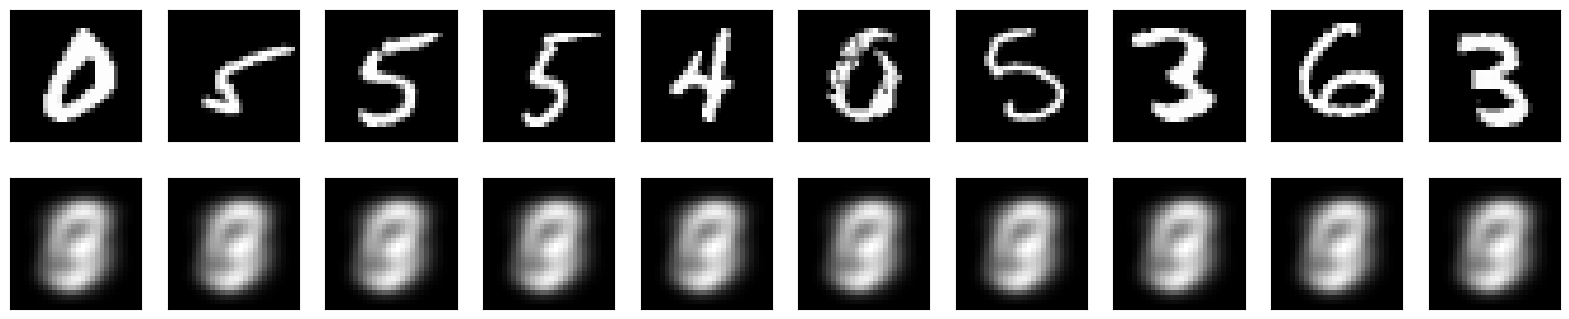

In [7]:
outputs = trained_model.predict(x_test)

plot_reconstructions(x_test, outputs['recon'])